# Risk Assessment

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from real_scenario import RealScenario

Lets again define the root dir to point to Problem folder

In [2]:
root_dir = '../'

After extracting relevant scenarios in Part 1 we will now proceed to assess thoses scenarios using different risk measures.

### Load the scenario files

In [3]:
scenario_list = list()
data_dir = os.path.join(root_dir, 'extraction/data')
for file_name in os.listdir(data_dir):
    if file_name.split('.')[-1] == 'json':
        scenario_list.append(RealScenario(int(file_name.split('.')[0].split('_')[-1]), pd.read_json(os.path.join(data_dir, file_name))))


### Calculate risk measures for all scenarios
This can take some time...

In [4]:
from risks import thw, ttc, ettc

thw_min = list()
ttc_min = list()
ettc_min = list()
ttr_thw_min = list()
ttr_ttc_min = list()

for scenario in tqdm(scenario_list):
    # calculate the risk values for each time step (that might take some time)
    scenario.calculate_risk(thw)
    scenario.calculate_risk(ttc)
    scenario.calculate_risk(ettc)

    # calculate the min values for the risk values
    scenario.calculate_risk_min()
    
    # Save the min values for hist plotting
    thw_min.append(scenario.thw_min_value)
    ttc_min.append(scenario.ttc_min_value)
    ettc_min.append(scenario.ettc_min_value)

  1%|▏         | 1/78 [00:01<01:32,  1.20s/it]/Users/TimSalzmann/Documents/Study/Stanford/ASL/projects/aa274b_hw2_internal/assessment/risks.py:81: RuntimeWarning: divide by zero encountered in double_scalars
  ettc = (v_rel / a_rel) * (1 - math.sqrt(1 - 2 * a_rel * ttc_value / v_rel))
/Users/TimSalzmann/Documents/Study/Stanford/ASL/projects/aa274b_hw2_internal/assessment/risks.py:81: RuntimeWarning: invalid value encountered in double_scalars
  ettc = (v_rel / a_rel) * (1 - math.sqrt(1 - 2 * a_rel * ttc_value / v_rel))
100%|██████████| 78/78 [02:42<00:00,  2.08s/it]


### Plot Histogram of risk measures over all scenarios

In [5]:
all_risk_min = thw_min + ttc_min + ettc_min

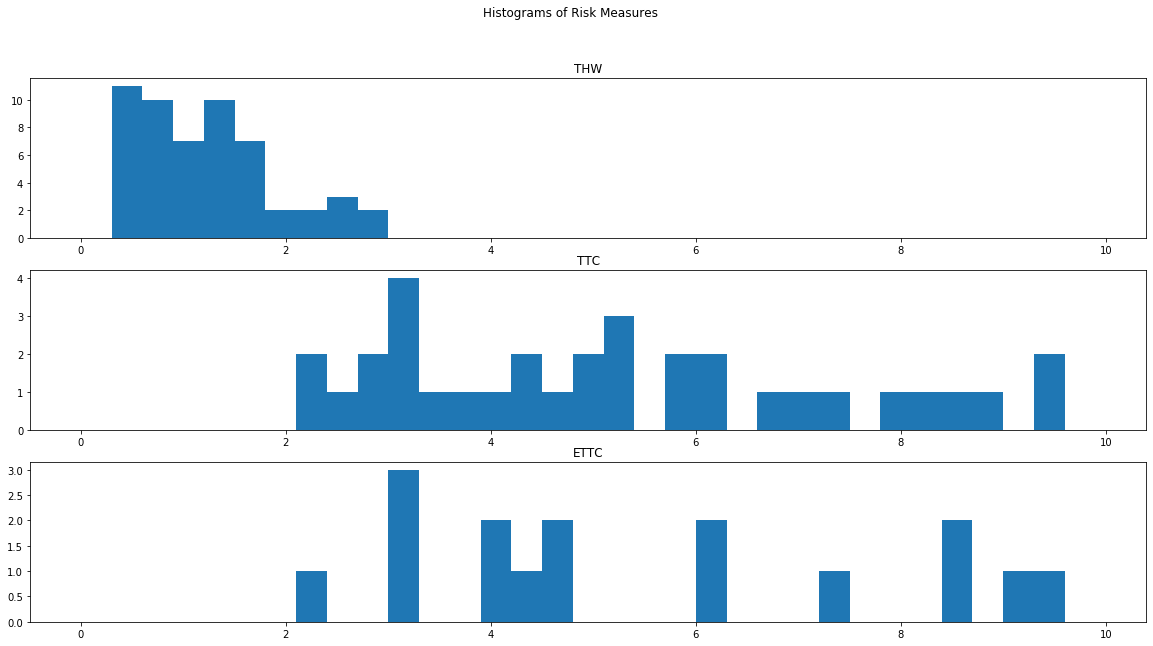

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(20, 10))
fig.suptitle('Histograms of Risk Measures')

ax[0].hist(np.array(thw_min, dtype=np.float), bins = np.arange(0, 10, 0.3))
ax[0].set_title('THW')

ax[1].hist(np.array(ttc_min, dtype=np.float), bins = np.arange(0, 10, 0.3))
ax[1].set_title('TTC')

ax[2].hist(np.array(ettc_min, dtype=np.float), bins = np.arange(0, 10, 0.3))
ax[2].set_title('ETTC')

pass